In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor, BaggingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split
import sklearn.cross_validation as cross_val
from sklearn.cross_validation import KFold
#from cross_validation import cross_val_apply
from sklearn.grid_search import GridSearchCV

import sklearn.feature_selection
# Switch to truncated view if too many columns
#pd.set_option('max_columns', 50)
#%matplotlib inline

#pd.set_option('display.max_columns', 500)
from __future__ import division
#!pip install pivottablejs
from pivottablejs import pivot_ui
pd.options.display.max_colwidth = 150
pd.options.display.max_columns = 200
import os.path
import re
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)
import copy

from pprint import pprint
from datetime import datetime as dt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.metrics import median_absolute_error, mean_squared_error,r2_score
import pickle


Populating the interactive namespace from numpy and matplotlib


/Users/tonita/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import HTMLParser
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from scipy import stats

import operator
from sklearn.manifold import TSNE
from textblob import TextBlob

In [945]:
ts_ps_2000_counts = []
sorted_tss = sorted(t_values.items(), key=operator.itemgetter(1))

for i in range(len(sorted_tss)):
    sign = False
    
    if p_valuess[sorted_tss[i][0]] < 0.05 :
        sign = True
        
    if sign == True :
        print sign,round(sorted_tss[i][1],3) ,round(p_valuess[sorted_tss[i][0]],3), sorted_tss[i]
        ts_ps_2000_counts.append([sign,round(sorted_tss[i][1],3) ,round(p_valuess[sorted_tss[i][0]],3), sorted_tss[i]])


True -3.81 0.0 (u'hiller\xf8d', -3.8099747151414372)
True -3.681 0.0 (u'totalkreditk\xf8berr\xe5dgiver', -3.6811949534826436)
True -3.658 0.0 (u'fritidshus', -3.6578011142681421)
True -3.549 0.0 (u'guderup', -3.5488618506696921)
True -3.458 0.001 (u'mdek\xf8berr\xe5dgiver', -3.4578944250437473)
True -2.975 0.003 (u'loftsbj\xe6lker', -2.9750790836215035)
True -2.922 0.003 (u'landskabet', -2.921892616521617)
True -2.917 0.004 (u'n\xe6stved', -2.9172556273889421)
True -2.884 0.004 (u'andelsbolig', -2.883745946334642)
True -2.875 0.004 (u'k\xf8berr\xe5dgiver', -2.8751535917229205)
True -2.861 0.004 (u'l\xe6kker', -2.8613321863680121)
True -2.825 0.005 (u'midtby', -2.8251673959415458)
True -2.749 0.006 (u'velegnet', -2.7490776757327575)
True -2.623 0.009 (u'vinkel', -2.623386729580973)
True -2.609 0.009 (u'mad', -2.6091456974292955)
True -2.608 0.009 (u'adskilt', -2.6081790576500543)
True -2.575 0.01 (u'br\xf8nderslev', -2.5751786626141109)
True -2.568 0.01 (u'thisted', -2.5682912513503693)

# Write to picke

In [950]:
pickle.dump(ps_ts_2000_counts, open( "Textstuff/ps_ts_2000_counts.p", "wb" ) )
pickle.dump(ts_ps_2000_counts, open( "Textstuff/ts_ps_2000_counts.p", "wb" ) )

#  2 - grams

### Counter

In [388]:
CountMatrix_2= CountVectorizer(encoding='utf-8',ngram_range=(2,2),max_features=2000)
CountMatrix_2.fit(dw['all_clean']) # find all words
CountMatrix_f_2 = CountMatrix_2.transform(dw['all_clean']) # create counts

print CountMatrix_f_2.shape

freqs = [(word, CountMatrix_f_2.getcol(idx).sum()) for word, idx in CountMatrix_2.vocabulary_.items()]
#sort from largest to smallest
word_counts_sored_2g = sorted (freqs, key = lambda x: -x[1])

word_counts_sored_2g

(8543, 2000)


[(u'k\xf8kken alrum', 2446),
 (u'\xe5ben forbindelse', 1923),
 (u'kort afstand', 1905),
 (u'totalkredit k\xf8berr\xe5dgiver', 1783),
 (u'gode v\xe6relser', 1749),
 (u'k\xf8berr\xe5dgiver tryghedsm\xe6rke', 1719),
 (u'god plads', 1659),
 (u'badev\xe6relse bruseniche', 1634),
 (u'mdevurderingskonsulent totalkredit', 1299),
 (u'stort sovev\xe6relse', 1061),
 (u'indehaverejendomsm\xe6glervurderingskonsulent totalkredit', 999),
 (u'overd\xe6kket terrasse', 993),
 (u't\xe6t ved', 987),
 (u'ejendomsm\xe6gler mdevurderingskonsulent', 980),
 (u'totalkreditk\xf8berr\xe5dgiver tryghedsm\xe6rke', 977),
 (u'loft kip', 873),
 (u'stor stue', 842),
 (u'valuarvurderingskonsulent totalkredit', 809),
 (u'blandt andet', 776),
 (u'stor grund', 770),
 (u'kan nyde', 757),
 (u'badev\xe6relse brus', 748),
 (u'vurderingvurderingskonsulent totalkredit', 723),
 (u'masser plads', 720),
 (u'ejendomsm\xe6glervurderingskonsulent totalkredit', 710),
 (u'god beliggenhed', 707),
 (u'kan nydes', 691),
 (u'salg vurderingv

## Tfitdf

In [389]:
transformer = TfidfTransformer()
Tf_CountMatrix_f_2 = transformer.fit_transform(CountMatrix_f_2)

print Tf_CountMatrix_f_2.shape

freqs = [(word, Tf_CountMatrix_f_2.getcol(idx).sum()) for word, idx in CountMatrix_2.vocabulary_.items()]
#sort from largest to smallest
word_tfidf_counts_sored_2 = sorted (freqs, key = lambda x: -x[1])

word_tfidf_counts_sored_2

(8543, 2000)


[(u'k\xf8kken alrum', 199.52566662856435),
 (u'kort afstand', 172.50436903934678),
 (u'\xe5ben forbindelse', 165.05201975561747),
 (u'totalkredit k\xf8berr\xe5dgiver', 160.17516710742831),
 (u'k\xf8berr\xe5dgiver tryghedsm\xe6rke', 156.81890577805621),
 (u'gode v\xe6relser', 156.0580842074767),
 (u'badev\xe6relse bruseniche', 154.22367217278958),
 (u'god plads', 152.73362692735284),
 (u'mdevurderingskonsulent totalkredit', 131.82866458485501),
 (u't\xe6t ved', 119.18541221367312),
 (u'indehaverejendomsm\xe6glervurderingskonsulent totalkredit',
  116.45112337709635),
 (u'totalkreditk\xf8berr\xe5dgiver tryghedsm\xe6rke', 111.824305897651),
 (u'overd\xe6kket terrasse', 109.72405906889563),
 (u'stort sovev\xe6relse', 109.68572626092538),
 (u'ejendomsm\xe6gler mdevurderingskonsulent', 107.77198653734214),
 (u'loft kip', 101.87133056424807),
 (u'valuarvurderingskonsulent totalkredit', 97.301085316858405),
 (u'stor stue', 96.573757136759326),
 (u'stor grund', 96.161991790010063),
 (u'badev\xe

## Stem counter

In [452]:
CountMatrix_s_2 = CountVectorizer(encoding='utf-8',ngram_range=(2,2),max_features=2000)
CountMatrix_s_2.fit(dw['stem_all']) # find all words
CountMatrix_f_s_2 = CountMatrix_s_2.transform(dw['stem_all']) # create counts

print CountMatrix_f_s_2.shape # nr of rows same as nr of titles and nr of columns nr of unique words

freqs = [(word, CountMatrix_f_s_2.getcol(idx).sum()) for word, idx in CountMatrix_s_2.vocabulary_.items()]
#sort from largest to smallest
word_counts_sored_s_2 = sorted(freqs, key = lambda x: -x[1])
word_counts_sored_s_2

(8543, 2000)


[(u'k\xf8k alrum', 2756),
 (u'kort afstand', 1949),
 (u'\xe5ben forbind', 1830),
 (u'totalkredit k\xf8berr\xe5dgiv', 1783),
 (u'k\xf8berr\xe5dgiv tryghedsm\xe6rk', 1719),
 (u'god plad', 1533),
 (u'god v\xe6r', 1477),
 (u'mdevurderingskonsulent totalkredit', 1299),
 (u'kan nyd', 1237),
 (u'badev\xe6r brusenich', 1185),
 (u'stor stue', 1052),
 (u'indehaverejendomsm\xe6glervurderingskonsulent totalkredit', 999),
 (u'loft kip', 992),
 (u't\xe6t ved', 987),
 (u'ejendomsm\xe6gl mdevurderingskonsulent', 980),
 (u'totalkreditk\xf8berr\xe5dgiv tryghedsm\xe6rk', 977),
 (u'stort sovev\xe6r', 963),
 (u'badev\xe6r brus', 961),
 (u'stor grund', 920),
 (u'rigt god', 851),
 (u'v\xe6r samt', 820),
 (u'stor lys', 816),
 (u'valuarvurderingskonsulent totalkredit', 809),
 (u'villa belig', 804),
 (u'bland and', 782),
 (u'vurderingvurderingskonsulent totalkredit', 723),
 (u'ejendomsm\xe6glervurderingskonsulent totalkredit', 710),
 (u'stue br\xe6ndeovn', 686),
 (u'salg vurderingvurderingskonsulent', 683),
 (u

## Stem tfidf

In [453]:
transformer = TfidfTransformer()
Tf_CountMatrix_f_s_2 = transformer.fit_transform(CountMatrix_f_s_2)

print Tf_CountMatrix_f_s_2.shape

freqs = [(word, Tf_CountMatrix_f_s_2.getcol(idx).sum()) for word, idx in CountMatrix_s_2.vocabulary_.items()]
#sort from largest to smallest
word_tfidf_counts_sored_s_2 = sorted (freqs, key = lambda x: -x[1])

word_tfidf_counts_sored_s_2

(8543, 2000)


[(u'k\xf8k alrum', 214.32447927608462),
 (u'kort afstand', 172.91141385499654),
 (u'\xe5ben forbind', 158.50236283723206),
 (u'totalkredit k\xf8berr\xe5dgiv', 157.5610291061019),
 (u'k\xf8berr\xe5dgiv tryghedsm\xe6rk', 154.05627542467002),
 (u'god plad', 140.43071385391977),
 (u'god v\xe6r', 137.01743987855627),
 (u'mdevurderingskonsulent totalkredit', 129.33541719148332),
 (u'badev\xe6r brusenich', 122.49199930457026),
 (u'kan nyd', 119.70505456782541),
 (u't\xe6t ved', 118.88674352345346),
 (u'indehaverejendomsm\xe6glervurderingskonsulent totalkredit',
  113.85157542989006),
 (u'stor stue', 110.96042885390563),
 (u'totalkreditk\xf8berr\xe5dgiv tryghedsm\xe6rk', 110.66391032742081),
 (u'loft kip', 110.22257068323603),
 (u'badev\xe6r brus', 110.19533587051785),
 (u'stor grund', 107.79112093860437),
 (u'ejendomsm\xe6gl mdevurderingskonsulent', 106.54760343227068),
 (u'stort sovev\xe6r', 101.38496552104326),
 (u'valuarvurderingskonsulent totalkredit', 96.201488800230408),
 (u'rigt god', 

In [398]:
names_word_count2 = []
for names, counts in word_tfidf_counts_sored_2:
    names_word_count2.append(names)

names_word_count2_s = []
for names, counts in word_tfidf_counts_sored_s_2:
    names_word_count2_s.append(names)

## Write to dataframes

In [467]:
dw_tf_2 = pd.DataFrame(Tf_CountMatrix_f_2.todense())
dw_tf_2.columns = names_word_count2

dw_tf_s_2 = pd.DataFrame(Tf_CountMatrix_f_s_2.todense())
dw_tf_s_2.columns = names_word_count2_s


dw_c_2 = pd.DataFrame(CountMatrix_f_2.todense())
dw_c_2.columns = names_word_count2
dw_c_s_2 = pd.DataFrame(CountMatrix_f_s_2.todense())
dw_c_s_2.columns = names_word_count2_s

In [457]:
dw_tf_2.head(3)

,køkken alrum,kort afstand,åben forbindelse,totalkredit køberrådgiver,køberrådgiver tryghedsmærke,gode værelser,badeværelse bruseniche,god plads,mdevurderingskonsulent totalkredit,tæt ved,indehaverejendomsmæglervurderingskonsulent totalkredit,totalkreditkøberrådgiver tryghedsmærke,overdækket terrasse,stort soveværelse,ejendomsmægler mdevurderingskonsulent,loft kip,valuarvurderingskonsulent totalkredit,stor stue,stor grund,badeværelse brus,vurderingvurderingskonsulent totalkredit,blandt andet,ejendomsmæglervurderingskonsulent totalkredit,god beliggenhed,salg vurderingvurderingskonsulent,stue brændeovn,kan nyde,masser plads,kan nydes,udgang terrasse,lyst køkken,rigtig god,direkte adgang,vaskemaskine tørretumbler,flot udsigt,central beliggenhed,hele familien,udgang haven,lys stue,faste skabe,disponible rum,huset ligger,trappe sal,ejendomsmægler valuarvurderingskonsulent,værelser samt,velholdt villa,stort køkken,brændeovn udgang,køkken spiseplads,åbne marker,indeholder entre,stue udgang,stort værelse,samt stort,stor lys,skole indkøb,stort badeværelse,fremvisning nybolig,plans villa,god skabsplads,plads både,attraktiv beliggenhed,store værelser,lyst badeværelse,ca km,indehaver ejendomsmægler,walk in,køkken åben,dejlig stor,centralt beliggende,forbindelse stuen,hårde hvidevarer,sydvendt terrasse,store vinduespartier,minutters kørsel,minutters gang,to gode,gode indkøbsmuligheder,disponibelt rum,lukket vej,indehaverejendomsmægler mdevurderingskonsulent,udgang stor,indbyggede skabe,flot badeværelse,god stand,lækkert badeværelse,villa beliggende,hyggelig stue,muret garage,mdevurderingskonsulent totalkreditkøberrådgiver,så kan,indeholder entré,godt lysindfald,stuen udgang,indehaverejendomsmægler valuarvurderingskonsulent,samt udgang,pænt badeværelse,fantastisk udsigt,badeværelse gulvvarme,god indretning,...,såfremt ønsker,skøn solrig,rummelig lys,sten eternittag,god tør,kvadratmeter fordeler,går igen,lavt varmeforbrug,nye boliger,besked nye,få besked,boliger før,facebook få,opført løbende,udenfor får,tilhørende badeværelse,flot indbydende,god anvendelig,samt plads,beliggende flot,velkommen via,lys velholdt,omgivelser så,ønsker fremvisning,stisystem skole,ejendommen byder,gode udhuse,garage el,bunden lukket,samt dejligt,stort grønt,adgang dejlig,hører garage,kvadratmeter stor,garage elport,hører dejlig,minutter bil,kan boltre,entré hvorfra,bruseniche gode,desuden to,ligesom altid,bolig sælges,gode regulære,stuen direkte,følg facebook,adgang gode,så bestil,skabe udgang,perfekte rammer,skoler daginstitutioner,samt redskabsrum,nybolig vejle,får flot,samtidig tæt,carport m2,kvm fordelt,adgang flot,nybolig hobro,samt praktisk,motorvej e45,haven dejlig,samt rummeligt,velholdt god,store badeværelse,kvadratmeter store,villa udsigt,kan bidrage,beliggende m²,vejle ejendomsmægler,mulighed åbne,helt igennem,udsigt landskabet,huset haven,stort spisebord,bryggers masser,præsentabel villa,stueplan byder,huset flot,rummelig vinkelstue,haven kan,kontakte ligesom,bidrage yderligere,flotte badeværelser,børneværelser stort,solen hele,ring bestil,rummer desuden,villaen rummer,får blandt,brug hverdagen,oplysninger ejendommen,tlf fremvisning,modsatte ende,tæt hverdagens,følg ejendomsmægler,hobro ejendomsmægler,både badekar,nyt hjem,boliger ejendomsmægler
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.176,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.188,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

## Regression

In [402]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std


std_scale = StandardScaler().fit(dw_c_2)
X_tr = std_scale.transform(dw_c_2)
#X_te = std_scale.transform(X_test)

std_scale = StandardScaler().fit(y_train)
y_tr = std_scale.transform(y_train)
#y_te =  std_scale.transform(y_test)

model = sm.OLS(y_tr, X_tr)
results2 = model.fit()

print(results2.summary())
print('R2: ', results2.rsquared)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2.623
Date:                Tue, 21 Jun 2016   Prob (F-statistic):          4.44e-181
Time:                        23:14:41   Log-Likelihood:                -9611.1
No. Observations:                8543   AIC:                         2.322e+04
Df Residuals:                    6546   BIC:                         3.730e+04
Df Model:                        1997                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0139      0.013      1.056      0.291        -0.012     0.040
x2            -0.0011      0.019     -0.057      0.9

/Users/tonita/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/tonita/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [408]:
print(results2.summary())
print('R2: ', results2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2.269
Date:                Tue, 21 Jun 2016   Prob (F-statistic):          3.61e-128
Time:                        23:33:20   Log-Likelihood:                -9909.0
No. Observations:                8543   AIC:                         2.375e+04
Df Residuals:                    6576   BIC:                         3.762e+04
Df Model:                        1967                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0075      0.011      0.662      0.508        -0.015     0.030
x2             0.0156      0.011      1.373      0.1

In [403]:
p_valuess2 = {}
t_values2 ={}

for i in xrange(0,len(results2.pvalues)):
    
    p_valuess2[dw_c_2.columns[i]] = results2.pvalues[i]
    t_values2[dw_c_2.columns[i]] = results2.tvalues[i]

In [956]:
sorted_pss_2 = sorted(p_valuess2.items(), key=operator.itemgetter(1))
ps_ts_2000_counts_S = []
predictive = 0
for i in range(len(sorted_pss_2)):
    sign = False
    if sorted_pss_2[i][1] < 0.05 :
        sign = True
        predictive+=1
        
    print sign, sorted_pss_2[i], round(t_values2[sorted_pss_2[i][0]],3)
    ps_ts_2000_counts_S.append([sign, sorted_pss_2[i], round(t_values2[sorted_pss_2[i][0]],3)])

print predictive

True (u'ugens dage', 1.5520098673738954e-15) 7.992
True (u'indflytningsklar bolig', 1.7801083412336504e-10) 6.389
True (u'flot lysindfald', 1.315297567992955e-07) 5.282
True (u'moderne k\xf8kken', 9.595461663682453e-07) -4.904
True (u'giver masser', 9.5954616636878147e-07) -4.904
True (u'm2 store', 2.395936585134792e-06) 4.721
True (u't\xe6t indk\xf8b', 1.19868447779213e-05) 4.381
True (u'halvandet plan', 1.4618190895493895e-05) -4.338
True (u'boligen fremst\xe5r', 1.4618190895497277e-05) -4.338
True (u'trappe salen', 2.253490258548186e-05) 4.241
True (u'f\xe5r stor', 4.0213586432649053e-05) 4.109
True (u'god garage', 4.7967285752411713e-05) 4.068
True (u'opvarmes via', 5.6805430909250565e-05) 4.028
True (u'tid fremvisning', 9.4122511457036341e-05) -3.908
True (u'ti minutters', 0.00019981537101347461) -3.721
True (u'v\xe6relse kontor', 0.00052875198785787378) 3.467
True (u'badev\xe6relse gulvvarme', 0.0005527918129002036) 3.455
True (u'ejendomskontor indehaver', 0.00056750101476732971)

In [957]:
sorted_tss2 = sorted(t_values2.items(), key=operator.itemgetter(1))
ts_ps_2000_counts_S = []
for i in range(len(sorted_tss2)):
    sign = False
    
    if p_valuess2[sorted_tss2[i][0]] < 0.05 :
        sign = True
        
    if sign == True :
        print sign,round(sorted_tss2[i][1],3) ,round(p_valuess2[sorted_tss2[i][0]],3), sorted_tss2[i]
        ts_ps_2000_counts_S.append([sign,round(sorted_tss2[i][1],3) ,round(p_valuess2[sorted_tss2[i][0]],3), sorted_tss2[i]])
        

True -4.904 0.0 (u'moderne k\xf8kken', -4.9044204549895589)
True -4.904 0.0 (u'giver masser', -4.9044204549894488)
True -4.338 0.0 (u'halvandet plan', -4.3376269352895473)
True -4.338 0.0 (u'boligen fremst\xe5r', -4.3376269352894967)
True -3.908 0.0 (u'tid fremvisning', -3.9076782328154254)
True -3.721 0.0 (u'ti minutters', -3.7213481361318324)
True -3.448 0.001 (u'ejendomskontor indehaver', -3.4483776178073873)
True -3.34 0.001 (u'ekstra badev\xe6relse', -3.3398601800408976)
True -3.34 0.001 (u'dejlige villa', -3.3398601800408616)
True -3.327 0.001 (u'stor spisestue', -3.3270986483372034)
True -3.013 0.003 (u'god mulighed', -3.0128404588607998)
True -2.98 0.003 (u'kan benyttes', -2.9799514846294053)
True -2.965 0.003 (u'lederejendomsm\xe6glervurderingskonsulent totalkredit', -2.9649136364077573)
True -2.938 0.003 (u'v\xe6relser samt', -2.9383049159721142)
True -2.865 0.004 (u'badev\xe6relse toilet', -2.8645263106085532)
True -2.865 0.004 (u'kolding ejendomsm\xe6gler', -2.8645263106085

## Write to pickle

In [958]:
pickle.dump(ps_ts_2000_counts_S, open( "Textstuff/ps_ts_2000_counts_S.p", "wb" ) )
pickle.dump(ts_ps_2000_counts_S, open( "Textstuff/ts_ps_2000_counts_S.p", "wb" ) )

# 1 gram and 2 grams

### Counter

In [462]:
CountMatrix_1_2= CountVectorizer(encoding='utf-8',ngram_range=(1,2),max_features=10000)
CountMatrix_1_2.fit(dw['all_clean']) # find all words
CountMatrix_f_1_2 = CountMatrix_1_2.transform(dw['all_clean']) # create counts

print CountMatrix_f_1_2.shape

freqs = [(word, CountMatrix_f_1_2.getcol(idx).sum()) for word, idx in CountMatrix_1_2.vocabulary_.items()]
#sort from largest to smallest
word_counts_sored_1_2g = sorted (freqs, key = lambda x: -x[1])

word_counts_sored_1_2g

(8543, 10000)


[(u'samt', 13176),
 (u'kan', 10207),
 (u'god', 9873),
 (u'nybolig', 9749),
 (u'k\xf8kken', 9725),
 (u'stor', 9099),
 (u'badev\xe6relse', 9088),
 (u'huset', 8371),
 (u'flot', 7943),
 (u'gode', 7708),
 (u'stort', 7429),
 (u'villa', 7135),
 (u'totalkredit', 6528),
 (u'udgang', 6436),
 (u'beliggende', 6281),
 (u'plads', 6260),
 (u'v\xe6relser', 6249),
 (u'stue', 6157),
 (u'store', 6126),
 (u'ejendommen', 5596),
 (u'ligger', 5475),
 (u'terrasse', 5468),
 (u'godt', 5047),
 (u's\xe5', 4954),
 (u'adgang', 4830),
 (u'sovev\xe6relse', 4816),
 (u'udsigt', 4753),
 (u'dejlig', 4613),
 (u'b\xe5de', 4495),
 (u't\xe6t', 4488),
 (u'ved', 4420),
 (u'beliggenhed', 4339),
 (u'villaen', 4321),
 (u'boligen', 4204),
 (u'bryggers', 3993),
 (u'v\xe6relse', 3971),
 (u'velholdt', 3919),
 (u'to', 3803),
 (u'bruseniche', 3576),
 (u'skole', 3552),
 (u'hele', 3549),
 (u'm2', 3512),
 (u'indrettet', 3410),
 (u'lys', 3369),
 (u'haven', 3364),
 (u'stuen', 3364),
 (u'indeholder', 3352),
 (u'sk\xf8n', 3242),
 (u'rum', 322

### Tf-idf

In [463]:
transformer = TfidfTransformer()
Tf_CountMatrix_f_1_2 = transformer.fit_transform(CountMatrix_f_1_2)

print Tf_CountMatrix_f_1_2.shape

freqs = [(word, Tf_CountMatrix_f_1_2.getcol(idx).sum()) for word, idx in CountMatrix_1_2.vocabulary_.items()]
#sort from largest to smallest
word_tfidf_counts_sored_1_2 = sorted (freqs, key = lambda x: -x[1])

word_tfidf_counts_sored_1_2

(8543, 10000)


[(u'samt', 282.82989904243806),
 (u'god', 237.5493953043956),
 (u'kan', 235.63696560305078),
 (u'huset', 231.1397254105288),
 (u'stor', 223.09588033693473),
 (u'villa', 216.03194288685765),
 (u'flot', 215.72597380373696),
 (u'stort', 194.24470034454396),
 (u'k\xf8kken', 191.14133242867553),
 (u'gode', 190.45165920385392),
 (u'badev\xe6relse', 183.10651617043089),
 (u'beliggende', 176.18169337393743),
 (u'ejendommen', 174.26777893061242),
 (u'plads', 172.27339131598757),
 (u'store', 169.65768273488544),
 (u'udsigt', 166.4258316708158),
 (u'udgang', 164.78596778600718),
 (u'nybolig', 160.55724422263179),
 (u'v\xe6relser', 160.50979104378746),
 (u'stue', 156.04850799151535),
 (u'terrasse', 156.01247264253146),
 (u'ligger', 155.22707690748817),
 (u'godt', 154.16923539314936),
 (u'villaen', 153.31902291260252),
 (u'adgang', 151.31051614991492),
 (u'dejlig', 149.75354179054662),
 (u's\xe5', 147.97397843946629),
 (u't\xe6t', 145.55226496561102),
 (u'm2', 143.85290112986758),
 (u'velholdt', 14

### Stem Count

In [464]:
CountMatrix_s_1_2 = CountVectorizer(encoding='utf-8',ngram_range=(1,2),max_features=10000)
CountMatrix_s_1_2.fit(dw['stem_all']) # find all words
CountMatrix_f_s_1_2 = CountMatrix_s_1_2.transform(dw['stem_all']) # create counts

print CountMatrix_f_s_1_2.shape # nr of rows same as nr of titles and nr of columns nr of unique words

freqs = [(word, CountMatrix_f_s_1_2.getcol(idx).sum()) for word, idx in CountMatrix_s_1_2.vocabulary_.items()]
#sort from largest to smallest
word_counts_sored_s_1_2 = sorted (freqs, key = lambda x: -x[1])
word_counts_sored_s_1_2

(8543, 10000)


[(u'god', 17603),
 (u'stor', 15213),
 (u'samt', 13285),
 (u'villa', 11855),
 (u'hus', 11840),
 (u'flot', 10318),
 (u'kan', 10207),
 (u'nybo', 9713),
 (u'badev\xe6r', 9610),
 (u'k\xf8k', 9263),
 (u'v\xe6r', 9017),
 (u'rum', 8923),
 (u'dej', 8098),
 (u'lig', 7725),
 (u'ejendom', 7682),
 (u'bol', 7536),
 (u'stort', 7429),
 (u'hyg', 7259),
 (u'udgang', 6535),
 (u'totalkredit', 6528),
 (u'belig', 6206),
 (u'stue', 6157),
 (u'lys', 6047),
 (u'plad', 5915),
 (u'sovev\xe6r', 5514),
 (u'terras', 5202),
 (u'sk\xf8n', 5073),
 (u'godt', 5048),
 (u'mul', 4992),
 (u's\xe5', 4954),
 (u'uds', 4849),
 (u'adgang', 4848),
 (u'b\xe5d', 4558),
 (u't\xe6t', 4536),
 (u'ved', 4427),
 (u'grund', 4335),
 (u'velhold', 4300),
 (u'beliggen', 4280),
 (u'indret', 4127),
 (u'skol', 3939),
 (u'lej', 3805),
 (u'to', 3803),
 (u'alrum', 3753),
 (u'sal', 3749),
 (u'hel', 3723),
 (u'omr\xe5d', 3609),
 (u'bryg', 3567),
 (u'm2', 3512),
 (u'stuen', 3431),
 (u'sommerhus', 3369),
 (u'find', 3345),
 (u'lyst', 3227),
 (u'byd', 32

### Stem tf-idf

## If i place min_df = 0.1 get 250 entries, if I place 0.05 get 520 entries 

In [465]:
transformer = TfidfTransformer()
Tf_CountMatrix_f_s_1_2 = transformer.fit_transform(CountMatrix_f_s_1_2)

print Tf_CountMatrix_f_s_1_2.shape

freqs = [(word, Tf_CountMatrix_f_s_1_2.getcol(idx).sum()) for word, idx in CountMatrix_s_1_2.vocabulary_.items()]
#sort from largest to smallest
word_tfidf_counts_sored_s_1_2 = sorted (freqs, key = lambda x: -x[1])

word_tfidf_counts_sored_s_1_2

(8543, 10000)


[(u'god', 340.72624367246897),
 (u'villa', 329.0920226010652),
 (u'stor', 308.40556484464071),
 (u'hus', 296.55150192192673),
 (u'samt', 282.78107207513807),
 (u'flot', 256.13335645378737),
 (u'kan', 234.27724335964189),
 (u'ejendom', 229.15892381553897),
 (u'rum', 212.21267057725669),
 (u'bol', 211.2292951200736),
 (u'dej', 210.52387374361274),
 (u'v\xe6r', 200.70021929489778),
 (u'hyg', 196.951037123476),
 (u'lig', 195.35361024485934),
 (u'stort', 193.71240238452532),
 (u'k\xf8k', 186.77239358597129),
 (u'badev\xe6r', 184.71784300261677),
 (u'lej', 177.61433510201334),
 (u'belig', 174.50555257422653),
 (u'sommerhus', 167.52325588539784),
 (u'uds', 167.19097290792743),
 (u'lys', 166.46520532036135),
 (u'udgang', 165.33473407877256),
 (u'plad', 164.66332577617712),
 (u'nybo', 159.4073350298755),
 (u'stue', 155.54888002882683),
 (u'sk\xf8n', 155.43769453019638),
 (u'godt', 153.66753758716172),
 (u'mul', 152.32971486104137),
 (u'velhold', 151.48962154530761),
 (u'adgang', 151.18477594115

### Place them in dataframe

In [466]:
names_word_count_1_2 = []
for names, counts in word_tfidf_counts_sored_1_2:
    names_word_count_1_2.append(names)

names_word_count_1_2_s = []
for names, counts in word_tfidf_counts_sored_s_1_2:
    names_word_count_1_2_s.append(names)

In [468]:
dw_tf_1_2 = pd.DataFrame(Tf_CountMatrix_f_1_2.todense())
dw_tf_1_2.columns = names_word_count_1_2

dw_tf_s_1_2 = pd.DataFrame(Tf_CountMatrix_f_s_1_2.todense())
dw_tf_s_1_2.columns = names_word_count_1_2_s


dw_c_1_2 = pd.DataFrame(CountMatrix_f_1_2.todense())
dw_c_1_2.columns = names_word_count_1_2
dw_c_s_1_2 = pd.DataFrame(CountMatrix_f_s_1_2.todense())
dw_c_s_1_2.columns = names_word_count_1_2_s

## Simple p-values

In [470]:
from scipy import stats

p_values = {}

for column in  dw_c_s_1_2.columns:
    #column_nr = dw_c_2000.columns[i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(dw_c_s_1_2[column].values,y_train)
    p_values[column] = p_value
    
    
import operator
sorted_ps = sorted(p_values.items(), key=operator.itemgetter(1))
print len(sorted_ps)

significant = []

for i in range(len(sorted_ps)):
    print sorted_ps[i]
    
    if sorted_ps[i][1] < 0.05 :
         significant.append(sorted_ps[i])
significant

10000
(u'lig n\xe6rheden', 6.8095073725464825e-64)
(u'altid mul', 1.1862732229304459e-59)
(u'halv', 7.9473707431823271e-59)
(u'bruseniche k\xe6ld', 9.5063226383455138e-54)
(u'ejere', 9.5063226383455138e-54)
(u'lig ca', 1.6174917695807347e-53)
(u'blik', 1.891505366702617e-53)
(u'stor syd', 4.2592233174475891e-52)
(u'ejendom rigt', 4.0970118399011684e-48)
(u'kan samles', 3.4409809381707253e-41)
(u'eg', 6.2262661648230577e-41)
(u'kontak ligesom', 1.9285273163199882e-39)
(u'm2 villa', 4.9151049424823921e-39)
(u'rum sal', 1.2132686905356412e-37)
(u'lokalmilj\xf8', 7.8555965701401434e-37)
(u'suppl', 7.8555965701401434e-37)
(u'klassisk stil', 1.7032080511147503e-36)
(u'vestvend', 7.2333359045973101e-35)
(u'r\xf8dt', 8.6019037696411796e-35)
(u'skol idr\xe6tsanl\xe6g', 1.8848337766769238e-33)
(u'rol omr\xe5de', 1.8848337766769238e-33)
(u'tr\xf8jborg', 1.8848337766769238e-33)
(u'opholdsomr\xe5d', 1.0485211394924616e-31)
(u'k\xe6ld find', 5.8368714015348504e-31)
(u'strand hyg', 1.0453737430426877

[(u'lig n\xe6rheden', 6.8095073725464825e-64),
 (u'altid mul', 1.1862732229304459e-59),
 (u'halv', 7.9473707431823271e-59),
 (u'bruseniche k\xe6ld', 9.5063226383455138e-54),
 (u'ejere', 9.5063226383455138e-54),
 (u'lig ca', 1.6174917695807347e-53),
 (u'blik', 1.891505366702617e-53),
 (u'stor syd', 4.2592233174475891e-52),
 (u'ejendom rigt', 4.0970118399011684e-48),
 (u'kan samles', 3.4409809381707253e-41),
 (u'eg', 6.2262661648230577e-41),
 (u'kontak ligesom', 1.9285273163199882e-39),
 (u'm2 villa', 4.9151049424823921e-39),
 (u'rum sal', 1.2132686905356412e-37),
 (u'lokalmilj\xf8', 7.8555965701401434e-37),
 (u'suppl', 7.8555965701401434e-37),
 (u'klassisk stil', 1.7032080511147503e-36),
 (u'vestvend', 7.2333359045973101e-35),
 (u'r\xf8dt', 8.6019037696411796e-35),
 (u'skol idr\xe6tsanl\xe6g', 1.8848337766769238e-33),
 (u'rol omr\xe5de', 1.8848337766769238e-33),
 (u'tr\xf8jborg', 1.8848337766769238e-33),
 (u'opholdsomr\xe5d', 1.0485211394924616e-31),
 (u'k\xe6ld find', 5.836871401534850

# Length of description

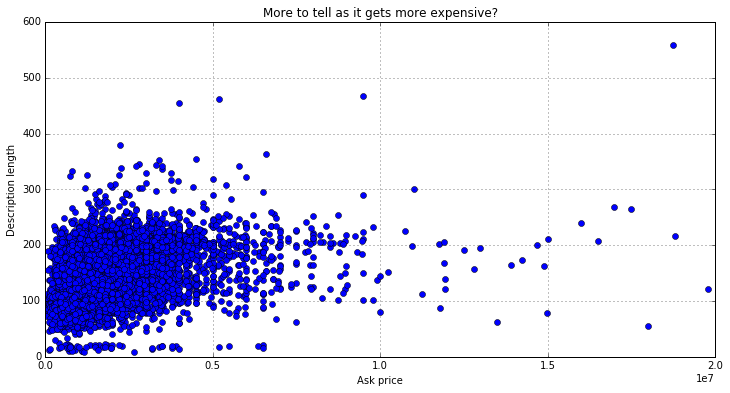

In [661]:
# nr of words
dw_train['descr_length'] = dw_train['all_clean'].apply(lambda x : len(x.split(' ')))

plt.plot(y_train, dw_train['descr_length'],'o')

plt.xlabel('Ask price')
plt.ylabel('Description length')
plt.title('More to tell as it gets more expensive?')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

140.261266534


/Users/tonita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x316afcb50>],
 'caps': [<matplotlib.lines.Line2D at 0x316b04a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x316b0dd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x316b0d750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x316afcd50>,
  <matplotlib.lines.Line2D at 0x316b04450>]}

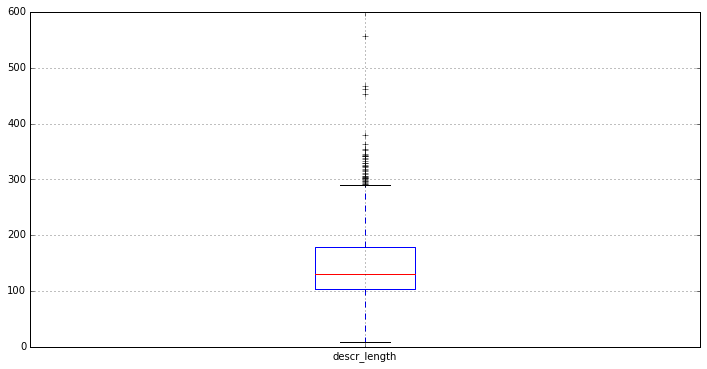

In [662]:
print dw_train['descr_length'].mean()
dw_train[['descr_length']].boxplot()

In [664]:
dw_train[dw_train['descr_length'] > 500]

,url,title_raw,reasons_to_buy,description_raw,stemtitle,stemdescription,title_clean,description_clean,reasons_to_buy_clean,stem_reasons_to_buy,all_clean,stem_all,raw_all,descr_length
9968,http://www.nybolig.dk/villa/2960/belcollesalle/260342/29001168,"Côte d'Azur i Rungsted - Rustikke terrasser, haveanlæg og fantastisk opvarmet pool i samspil med gennemtænkt, smuk og arkitekttegnet ejendom",Diskret og autentisk luksus-kompromisløst design og renovering-mulighed for registrering af i alt ca. 412 m2,"-\t Côte d'Azur i Rungsted - Rustikke terrasser, haveanlæg og fantastisk opvarmet pool i samspil med gennemtænkt, smuk og arkitekttegnet ejendom. ...",côte dazur rungsted rustik terras haveanlæg fantastisk opvarm pool samspil gennemtænk smuk arkitekttegn ejendom,côte dazur rungsted rustik terras haveanlæg fantastisk opvarm pool samspil gennemtænk smuk arkitekttegn ejendom uovertruf luksus harmonisk indretn...,côte dazur rungsted rustikke terrasser haveanlæg fantastisk opvarmet pool samspil gennemtænkt smuk arkitekttegnet ejendom,côte dazur rungsted rustikke terrasser haveanlæg fantastisk opvarmet pool samspil gennemtænkt smuk arkitekttegnet ejendom uovertruffen luksus harm...,diskret autentisk luksus kompromisløst design renovering mulighed registrering ca m2,diskr autentisk luksus kompromisløs design renovering mul registrering ca m2,côte dazur rungsted rustikke terrasser haveanlæg fantastisk opvarmet pool samspil gennemtænkt smuk arkitekttegnet ejendom diskret autentisk luksus...,côte dazur rungsted rustik terras haveanlæg fantastisk opvarm pool samspil gennemtænk smuk arkitekttegn ejendom diskr autentisk luksus kompromislø...,"Côte d'Azur i Rungsted - Rustikke terrasser, haveanlæg og fantastisk opvarmet pool i samspil med gennemtænkt, smuk og arkitekttegnet ejendom. Disk...",558


### Word 2 Vec !!! 

In [36]:
words_to_remove = ['så','det','den']

def CleanDescription(all_info):
    
    all_info = re.split(',|/|-|\s+', all_info)
    
    # lower letters
    tokens = [w.lower() for w in all_info if not w.isdigit() and w not in words_to_remove ]

    #remove stopwords
    #tokens = [word for word in tokens if word.decode('utf-8') not in stopwords.words('danish')]
    tokens = [word for word in tokens if word not in stopwords.words('danish')]
    
    #If I do not want stemning
    pars = HTMLParser.HTMLParser()
    #tokens = [pars.unescape(word.decode('utf8')) for word in tokens]
    tokens = [pars.unescape(word) for word in tokens]

    #remove special characters
    tokens = [re.sub(r'[\W_]+', u'', word, flags=re.UNICODE) for word in tokens]

    #remove empty words
    tokens = filter(None, tokens)

    return " ".join(tokens)

def CleanDescriptionSTEM(all_info):
    
    all_info = re.split(',|/|-|\s+', all_info)

    # lower letters
    tokens = [w.lower() for w in all_info if not w.isdigit() and w not in words_to_remove]

    #remove stopwords
    #tokens = [word for word in tokens if word.decode('utf-8') not in stopwords.words('danish')]
    tokens = [word for word in tokens if word not in stopwords.words('danish')]

    #Stem Stem!!!
    pars = HTMLParser.HTMLParser()
    stemmer = SnowballStemmer("danish")
    tokens = [pars.unescape(stemmer.stem(word)) for word in tokens]

    #remove special characters
    tokens = [re.sub(r'[\W_]+', u'', word, flags=re.UNICODE) for word in tokens]

    #remove empty words
    tokens = filter(None, tokens)

    return " ".join(tokens)

In [37]:
#from nltk.corpus import stopwords
#stopwords.words('danish')

In [38]:
#dw = pd.read_csv('Features_processed_TEXT.csv', sep=';', encoding = 'utf-8')

In [39]:
dw_train.head(2)

,url,title_raw,reasons_to_buy,description_raw,stemtitle,stemdescription,title_clean,description_clean,reasons_to_buy_clean,stem_reasons_to_buy,all_clean,stem_all,raw_all
1034,http://www.nybolig.dk/villa/8870/tulipanvej/270141/r4762,NaN,Bygget i god kvalitet-Børnevenligt område-Stue med loft i kip,Dejligt familievenligt hus i Blomsterparken. Huset er bygget i røde sten og har et flot rødt cementstens tag. Huset har en god indretning og frems...,NaN,dej familieven hus blomsterparken hus byg rød sten flot rødt cementst tag hus god indretning fremstår velhold hyggeligt gulvvarm hel huset fibern ...,NaN,dejligt familievenligt hus blomsterparken huset bygget røde sten flot rødt cementstens tag huset god indretning fremstår velholdt hyggeligt gulvva...,bygget god kvalitet børnevenligt område stue loft kip,byg god kvalit børneven områd stue loft kip,bygget god kvalitet børnevenligt område stue loft kip dejligt familievenligt hus blomsterparken huset bygget røde sten flot rødt cementstens tag ...,byg god kvalit børneven områd stue loft kip dej familieven hus blomsterparken hus byg rød sten flot rødt cementst tag hus god indretning fremstår...,. Bygget i god kvalitet. Børnevenligt område. Stue med loft i kip. Dejligt familievenligt hus i Blomsterparken. Huset er bygget i røde sten og har...
3905,http://www.nybolig.dk/villa/7752/markstien/270144/hv4853,Renoveret rødstensvilla beliggende i fredelige og naturskønne omgivelser.,Hyggeligt kvarter-Fredelige omgivelser-Nyrenoveret bolig,"Her får du et godt og solidt hus med kort afstand til skole, fritidsaktiviteter og indkøbsmuligheder i Koldby. Toget kan tages direkte mod Struer ...",renov rødstensvilla belig fred naturskøn omgivelser,får godt solid hus kort afstand skol fritidsaktivitet indkøbsmu koldby tog kan tag direk struer thisted få hundred met adressen få hundred met hør...,renoveret rødstensvilla beliggende fredelige naturskønne omgivelser,får godt solidt hus kort afstand skole fritidsaktiviteter indkøbsmuligheder koldby toget kan tages direkte struer thisted få hundrede meter adress...,hyggeligt kvarter fredelige omgivelser nyrenoveret bolig,hyg kvart fred omgiv nyrenov bol,renoveret rødstensvilla beliggende fredelige naturskønne omgivelser hyggeligt kvarter fredelige omgivelser nyrenoveret bolig får godt solidt hus k...,renov rødstensvilla belig fred naturskøn omgivelser hyg kvart fred omgiv nyrenov bol får godt solid hus kort afstand skol fritidsaktivitet indkøbs...,Renoveret rødstensvilla beliggende i fredelige og naturskønne omgivelser.. Hyggeligt kvarter. Fredelige omgivelser. Nyrenoveret bolig. Her får du ...


In [40]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    # 5. Return a list of words
    return(words)

In [41]:
#CleanDescription(all_info)
import nltk.data
#nltk.download() 

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/danish.pickle')

In [42]:
# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False, Stem = False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            
            if Stem:
                sentences.append(CleanDescriptionSTEM(raw_sentence).split(" "))
            else:
                # Otherwise, call review_to_wordlist to get a list of words
                sentences.append(CleanDescription(raw_sentence).split(" "))
            
            
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [43]:
#sentences = 'Sjældent udbudt rækkehus med 3 vær. på lukket villavej i Nyager kvarteret. Sjældent udbudt rækkehus. Indflytningsklart. Populær beliggenhed. I det...'
#a = review_to_sentences(sentences, tokenizer )

## Create Clean and Stemmed sentences W2Vec Models

In [44]:
sentences = []  # Initialize an empty list of sentences

for index, row in dw_train.iterrows():
    sentences += review_to_sentences(row['raw_all'], tokenizer)

/Users/tonita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [45]:
sentences_stem = []  # Initialize an empty list of sentences

for index, row in dw_train.iterrows():
    sentences_stem += review_to_sentences(row['raw_all'], tokenizer,Stem = True )

/Users/tonita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
ERROR: 

Traceback (most recent call last):
  File "/Users/tonita/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1120, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/tonita/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 301, in wrapped
    return f(*args, **kwargs)
  File "/Users/tonita/anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 346, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/tonita/anaconda/lib/python2.7/inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/Users/tonita/anaconda/lib/python2.7/inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Users/tonita/anaconda/lib/python2.7/inspect.py", line 451, in getsourcefile
    if os.path.exists(filename):
  File "/Users/tonita/anaconda/l

Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

In [ ]:
print len(sentences)
print len(sentences_stem)
print dw_train.shape

In [ ]:
for i in range(len(sentences[:100])):
    print sentences[i]
    print sentences_stem[i]

In [ ]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

import cython

# Set values for various parameters
num_features = 100    # Word vector dimensionality    #was 100                  
min_word_count = 5   # Minimum word count           #was 50         
num_workers = 4       # Number of threads to run in parallel
context = 10        # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec

print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

print "Training model Stem..."
model_s = word2vec.Word2Vec(sentences_stem, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)
model_s.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model.save('W2v_100_5_4_10')
model_s.save('W2v_100_5_4_10_s')

## Load existing models

In [46]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

import cython

from gensim.models import word2vec

model = word2vec.Word2Vec.load('W2v_100_5_4_10')
model_s = word2vec.Word2Vec.load('W2v_100_5_4_10_s')

In [230]:
'''
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model_s = word2vec.Word2Vec(sentences_stem, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)
'''

'\nmodel = word2vec.Word2Vec(sentences, workers=num_workers,             size=num_features, min_count = min_word_count,             window = context, sample = downsampling)\n\nmodel_s = word2vec.Word2Vec(sentences_stem, workers=num_workers,             size=num_features, min_count = min_word_count,             window = context, sample = downsampling)\n'

In [47]:
model.doesnt_match("Villa har ikke hund".split())

'ikke'

In [232]:
model.doesnt_match("altan køkken buttiken".split())

'altan'

In [50]:
model.most_similar(u'renoveret')

[(u'moderniseret', 0.899238109588623),
 (u'istandsat', 0.8373045921325684),
 (u'vedligeholdt', 0.7764096260070801),
 (u'nyrenoveret', 0.7750450372695923),
 (u'totalrenoveret', 0.7573848366737366),
 (u'blevet', 0.7559235692024231),
 (u'opdateret', 0.7488057613372803),
 (u'indvendig', 0.7245607376098633),
 (u'renovering', 0.7244375944137573),
 (u'ombygget', 0.7182329297065735)]

In [418]:
model.most_similar(u'aktivitetsrum')

[(u'multirum', 0.9140908122062683),
 (u'gildestue', 0.8814020752906799),
 (u'gildesal', 0.8739221692085266),
 (u'hobbyrum', 0.8605703115463257),
 (u'g\xe6stev\xe6relse', 0.8481900095939636),
 (u'loftsrum', 0.8188917636871338),
 (u'loftrum', 0.8120815753936768),
 (u'legerum', 0.8096557855606079),
 (u'teenageafdeling', 0.8009453415870667),
 (u'disprum', 0.7948269844055176)]

In [163]:
model[u'tagterrasse']

array([-0.1239308 , -1.35572124,  0.90554953, -0.00848188,  0.14553279,
        0.59547013,  0.51845646,  0.28023651, -0.31332377,  0.04477547,
       -0.50026953, -0.99937522,  0.20477279, -0.94122827,  0.19045225,
       -0.25151485,  0.16979343, -0.04684463, -0.41662091, -0.5756911 ,
        0.26113224,  0.33768266, -0.05176419,  0.34008241,  0.56783223,
        0.33023196, -0.35407907,  0.60121429, -0.34256977,  0.23931342,
       -0.99738324,  0.44244033,  0.41982481, -0.44419202,  0.32006523,
       -0.46518451, -0.47578016,  0.85778296,  0.06760862, -0.28137386,
       -0.44619691, -0.66789591,  0.83292258,  0.13934714, -0.29914629,
        0.93793178, -0.33516383,  0.77760667,  0.74523872,  0.6427784 ,
       -0.1713528 ,  0.92498952, -0.79001117, -0.57008308, -0.21239044,
        0.26887053,  0.16252922,  0.60046178, -0.07083113, -0.26627281,
       -0.40506545, -0.22757864,  0.17819487,  0.13412669, -0.21183522,
       -0.47270572, -0.33413118, -0.43091127, -0.42212021, -0.37

## TSNE OF P-values all

In [21]:
fileObject = open('TextStuff/ps_ts_2000_counts.p','r') 
p = pickle.load(fileObject)  
p

[[True, (u'store', 3.2381332875832432e-139), 1.044],
 [True, (u'smukke', 5.4405191184472065e-124), 1.83],
 [True, (u'helt', 2.0763691229149044e-102), -2.056],
 [True, (u'smuk', 7.8805427199015906e-102), 3.441],
 [True, (u'fantastisk', 3.6411207372183067e-97), 1.379],
 [True, (u'detaljer', 9.3545627320940287e-93), -2.06],
 [True, (u'hall', 6.7557600146680603e-86), 0.951],
 [True, (u'pejs', 6.8332768348854931e-82), 1.132],
 [True, (u'enest\xe5ende', 3.4618733496527513e-76), -1.022],
 [True, (u'mest', 5.783610994087608e-65), 2.31],
 [True, (u'l\xe6kre', 3.5630927856859433e-64), -0.797],
 [True, (u'unik', 1.5704413209991806e-63), 1.944],
 [True, (u'smukt', 5.3584073875215875e-63), -0.721],
 [True, (u'direkte', 2.1596735760119274e-60), 1.034],
 [True, (u'frederiksberg', 4.8232038907832394e-56), 2.884],
 [True, (u'to', 1.0108106129053844e-53), -0.712],
 [True, (u'hele', 6.3085270328944855e-52), -0.745],
 [True, (u'udsigt', 1.9783824319405107e-50), -1.021],
 [True, (u'flotte', 5.1006510295362

In [235]:
len(p)

1000

In [22]:
most_p_2000_all = []

for row in p:
    most_p_2000_all.append(row[1][0])

In [23]:
len(most_p_2000_all)

1000

In [24]:
embeddings = []
for word in most_p_2000_all:
    print word
    embeddings.append(model[word])
    #print model[word]

store


NameError: name 'model' is not defined

In [239]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
  assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
  plt.figure(figsize=(18, 18))  #in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.279918
[t-SNE] Error after 100 iterations with early exaggeration: 1.250836
[t-SNE] Error after 175 iterations: 1.190577


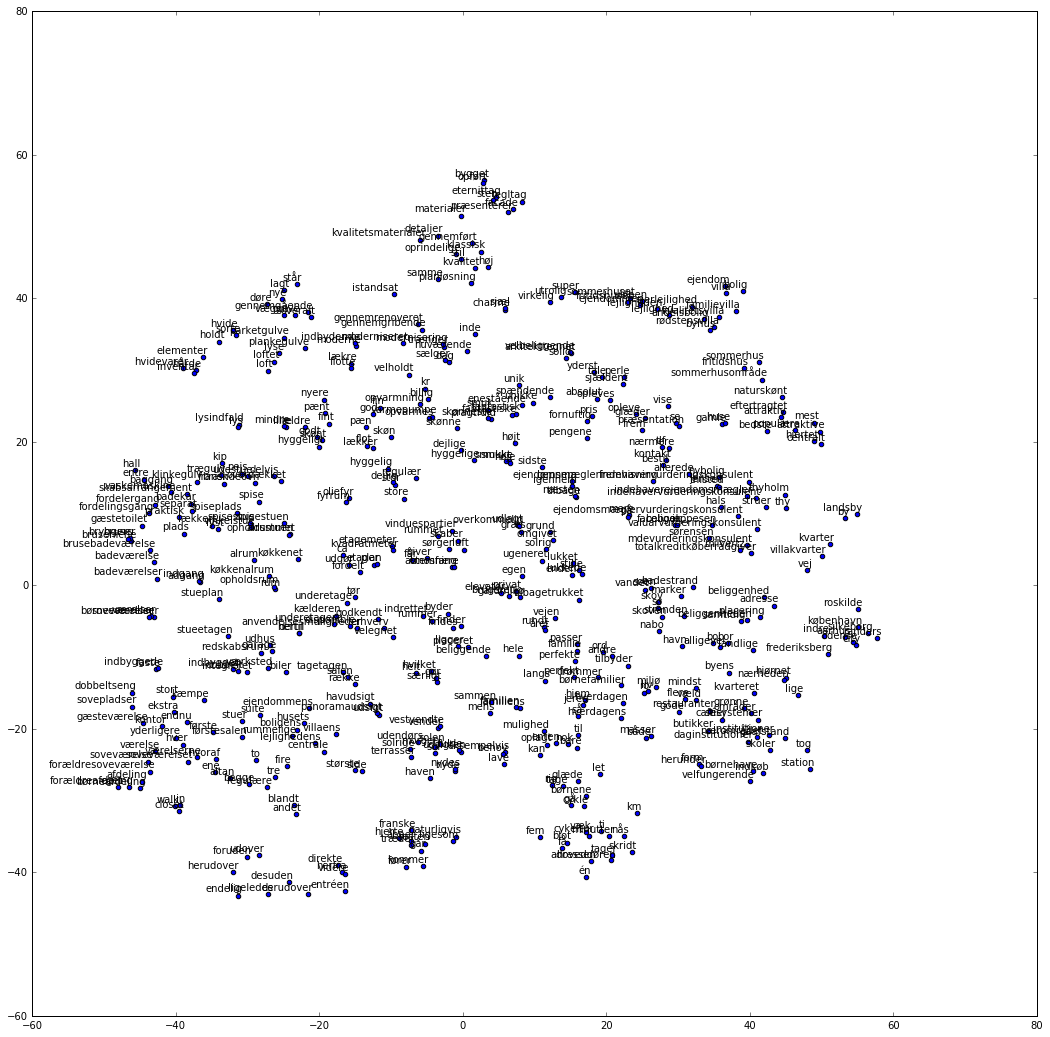

In [251]:
tsne = TSNE(perplexity=5, n_components=2, learning_rate=700, random_state=30, init='pca', n_iter=300, early_exaggeration = 7, verbose= True)
plot_only = 500
low_dim_embs = tsne.fit_transform(embeddings[:plot_only])
labels = [most_p_2000_all[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)

## On 1-2 grams clean p

In [275]:
fileObject = open('TextStuff/all_clean_(1, 2)_3000C_MI.p','r') 
p = pickle.load(fileObject)  
most_imp = p[-1]

In [346]:
len(most_imp)

1857

In [401]:
important_words = []

for key, value in  most_imp.iteritems():
    
    if value > 0 and key not in X_train.columns :
    
        words = key.split(" ")
        
        if len(words) > 1:
            important_words.append(words[0])
            important_words.append(words[1])
        else :
            important_words.append(key)
            
print len(most_imp)
print len(important_words)

1857
2426


In [402]:
all_most  = important_words
important_words = []

for word in all_most:
    if word not in important_words:
        important_words.append(word)
        

In [406]:
#important_words[:10]

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.283689
[t-SNE] Error after 100 iterations with early exaggeration: 1.232631
[t-SNE] Error after 175 iterations: 1.150460


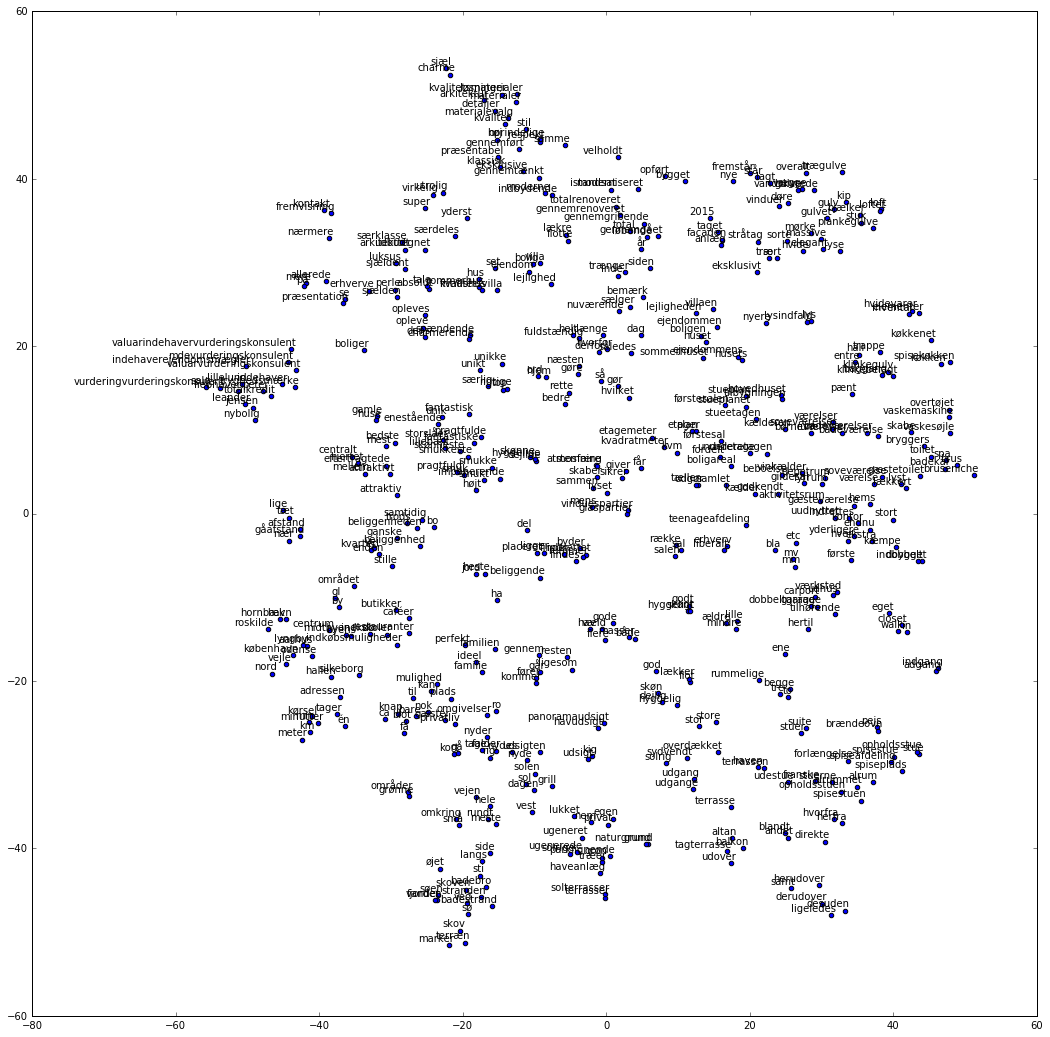

In [408]:
embeddings_1_2_p = [model[word] for word in important_words]

tsne = TSNE(perplexity=5, n_components=2, learning_rate=700, random_state=30, init='pca', n_iter=300, early_exaggeration = 7, verbose= True)
plot_only = 500
low_dim_embs = tsne.fit_transform(embeddings_1_2_p[:plot_only])
labels = [important_words[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)

### Translate words

In [410]:
important_words_en = []
important_words_tra = []
no_tra = []
for word in important_words :

    try:
        en_blob = TextBlob(word)
        important_words_en.append(unicode(en_blob.translate(to='en')))
        important_words_tra.append(word)
        
    except :
        if len(word) > 3:
            w = TextBlob(word)
            if w.detect_language() == 'en':
                important_words_en.append(unicode(w))
                important_words_tra.append(word)
            else :
                no_tra.append(word)

In [411]:
print len(important_words)
print len(important_words_en)
print len(important_words_tra)
print(len(no_tra))

1251
1136
1136
83


## Tsne of translated

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.283856
[t-SNE] Error after 100 iterations with early exaggeration: 1.216098
[t-SNE] Error after 175 iterations: 1.183768


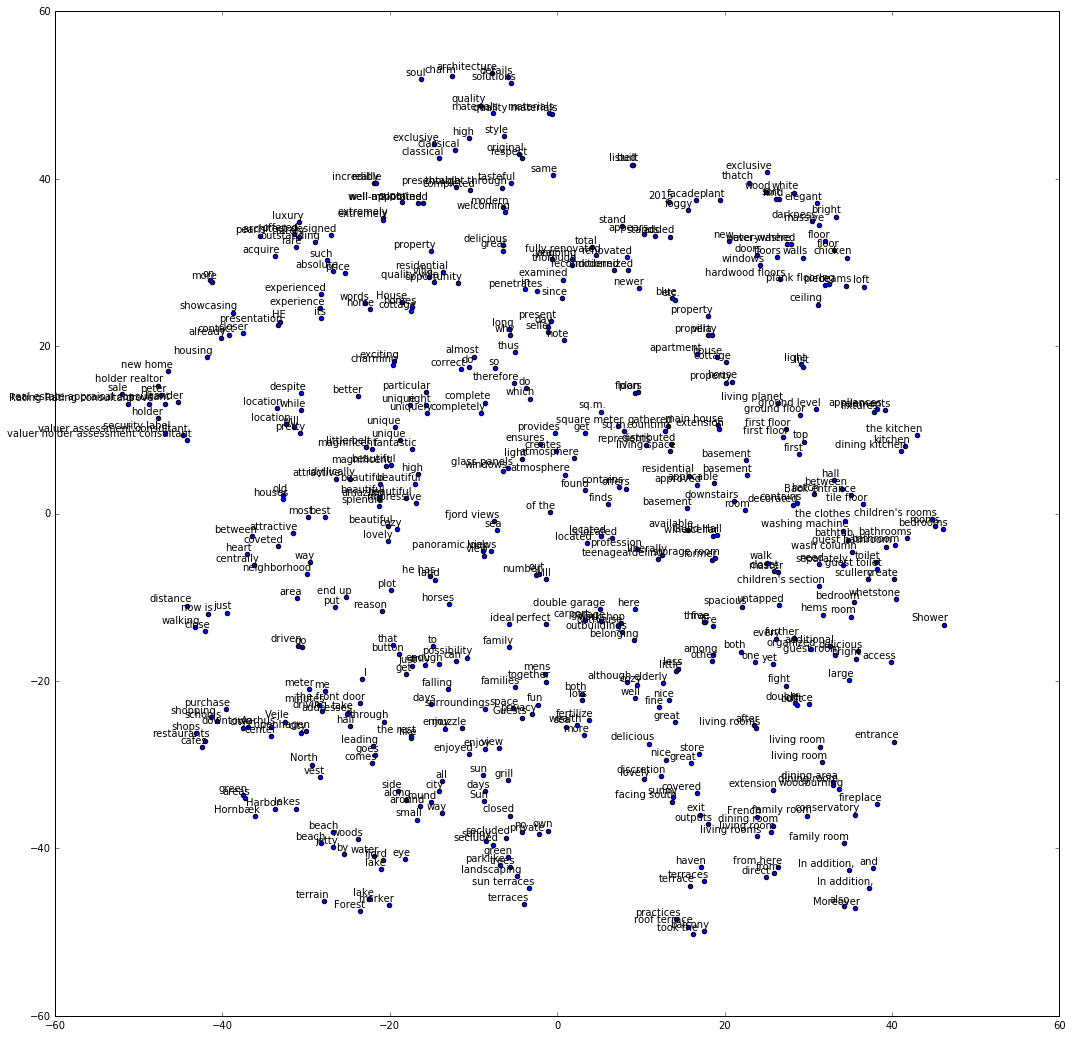

In [419]:
embeddings_1_2_p = [model[word] for word in important_words_tra]

tsne = TSNE(perplexity= 5, n_components=2, learning_rate=700, random_state=30, init='pca', n_iter=300, early_exaggeration = 7, verbose= True)
plot_only = 500
low_dim_embs = tsne.fit_transform(embeddings_1_2_p[:plot_only])
labels = [important_words_en[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)

In [413]:
important_words_en[0]

u'property'

In [414]:
a = TextBlob('houses')
a.tags[0][1] 

u'NNS'

### Nouns and not nouns

In [415]:
nouns_da = []
nouns_en = []

for i in range(len(important_words_en)):
    en_word = important_words_en[i]
    
    if 'NN' in TextBlob(en_word).tags[0][1] :
 
        nouns_da.append(important_words_tra[i])
        nouns_en.append(en_word)
        
non_nouns_da = [ word for word in important_words_tra if word not in nouns_da ]   
non_nouns_en = [ word for word in important_words_en if word not in nouns_en ]  
    

** NOUNS tsne **

622
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.282829
[t-SNE] Error after 100 iterations with early exaggeration: 1.216538
[t-SNE] Error after 175 iterations: 1.486575


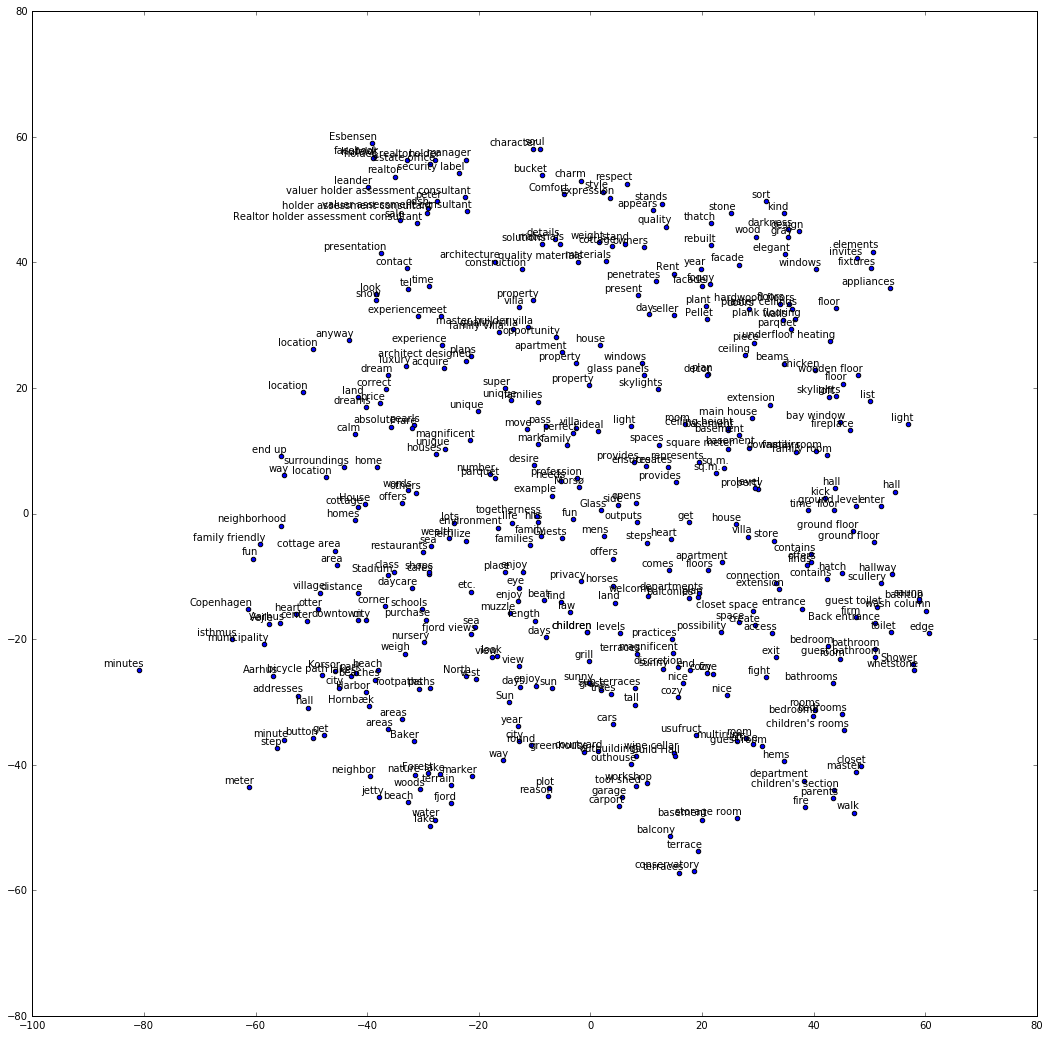

In [420]:
print len(nouns_en)

embeddings_1_2_p = [model[word] for word in nouns_da]

tsne = TSNE(perplexity= 5, n_components=2, learning_rate=700, random_state=30, init='pca', n_iter=500, early_exaggeration = 7, verbose= True)
plot_only = 400
low_dim_embs = tsne.fit_transform(embeddings_1_2_p[:plot_only])
labels = [nouns_en[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)

** NOT NOUNS tsne**

514
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 514 / 514
[t-SNE] Mean sigma: 0.334128
[t-SNE] Error after 100 iterations with early exaggeration: 1.191015
[t-SNE] Error after 175 iterations: 1.083565


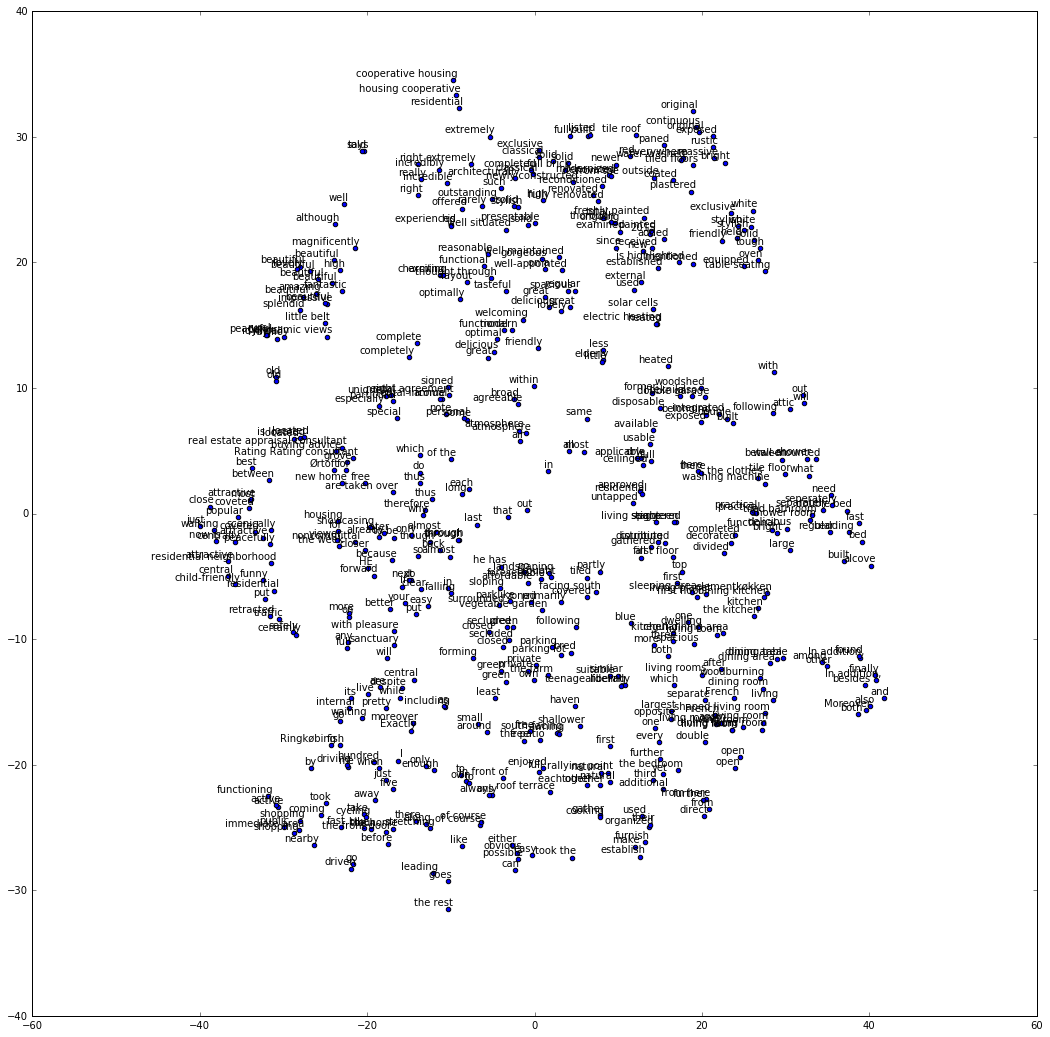

In [417]:
print len(non_nouns_da)

embeddings_1_2_p = [model[word] for word in non_nouns_da]

tsne = TSNE(perplexity= 10, n_components=2, learning_rate=700, random_state=30, init='pca', n_iter=500, early_exaggeration = 7, verbose= True)
plot_only = len(non_nouns_da)
low_dim_embs = tsne.fit_transform(embeddings_1_2_p[:plot_only])
labels = [non_nouns_en[i] for i in xrange(plot_only)]
plot_with_labels(low_dim_embs, labels)


# Quick look at 2-2

In [5]:
fileObject = open('TextStuff/stem_all_(2, 2)_1500C_MI.p','r') 
p = pickle.load(fileObject)  
feats = p[-1]

In [9]:
most_imp = []
for key, value in feats.iteritems():
   # if key not in X_train.columns:
    if value > 0:
        print key, value


    try:
        en_blob = TextBlob(key)
        print en_blob.translate(to='en')

    except :
        if len(key) > 3:
            w = TextBlob(key)
            if w.detect_language() == 'en':
                print w
            else :
                print key

taxation_current 0.554940225578
taxation_current
real_estate_tax_adj 0.161204148877
real_estate_tax_adj
ejerforhold_kode_41.0 0.0642301017033
ejerforhold_kode_41.0
bebo_arl 0.0129015781611
bebo_arl
average_sales_price_loc_nat_dif 0.0105609271661
average_sales_price_loc_nat_dif
average_sales_price_local 0.0102324676791
average_sales_price_local
pct_households_with_children 0.0101346453368
pct_households_with_children
population_density 0.00881863982936
population_density
lon+lat_bbr 0.00793484109228
lon+lat_bbr
construction_year 0.00633766405725
construction_year
construction_age 0.00601698780402
construction_age
emergency_distancekilometers 0.00564613785615
emergency_distancekilometers
doctor_distance 0.0048885903521
doctor_distance
market_distancekilometers 0.00471670604815
market_distancekilometers
school_distance 0.00471273586675
school_distance
lon+lat_bbr_sqrt 0.00470674045294
lon+lat_bbr_sqrt
lon/lat 0.00417160915437
lon/lat
direk adgang 0.00320997270131
directional access
lat+lo

# 1 gram model

In [28]:
fileObject = open('TextStuff/all_clean_(1, 1)_1500_C.p','r') 
p = pickle.load(fileObject)  
feats = p[-1]

In [29]:
most_imp = []
for key, value in feats.iteritems():
   # if key not in X_train.columns:
    if value > 0:
        print key, value

    '''
    try:
        en_blob = TextBlob(key)
        print en_blob.translate(to='en')

    except :
        if len(key) > 3:
            w = TextBlob(key)
            if w.detect_language() == 'en':
                print w
            else :
                print key
    '''

taxation_current 0.550312525352
real_estate_tax_adj 0.158651381995
ejerforhold_kode_41.0 0.0642141967106
average_sales_price_local 0.00987688586175
bebo_arl 0.00941524958821
average_sales_price_loc_nat_dif 0.00908873347551
pct_households_with_children 0.00891304659449
population_density 0.0078588014174
lon+lat_bbr 0.00665106513771
construction_year 0.0047605704507
construction_age 0.00432886840014
lon+lat_bbr_sqrt 0.00305264847423
emergency_distancekilometers 0.00294746045408
school_distance 0.00272698562787
market_distancekilometers 0.00248697953166
doctor_distance 0.00228996972289
lat+lon_bbr_cos 0.00226159785881
ejendommens 0.0021851912954
flot 0.00204164676533
lon/lat 0.00198180327797
fantastisk 0.00158318679014
absolut 0.0014647640438
unik 0.00133963399025
vaerelse_ant 0.00131968735526
smuk 0.00115481685048
enestående 0.00115315404115
helt 0.00111626578627
mest 0.00110002060883
ejendommen 0.00106007999754
bygget 0.00105288887146
udsigt 0.00101288555213
vedligeholdt 0.0009981951185

In [35]:
fileObject = open('TextStuff/stem_all_(1, 2)_3000C_MI.p','r') 
p = pickle.load(fileObject)  

for key, value in p[-1].iteritems():
    if value > 0:
        print key, value

taxation_current 0.548167023231
real_estate_tax_adj 0.157084657793
ejerforhold_kode_41.0 0.0641512980854
average_sales_price_loc_nat_dif 0.00995346248164
average_sales_price_local 0.0084849922636
pct_households_with_children 0.00776435068442
population_density 0.00727222866878
bebo_arl 0.0062711041038
liebhaveri 0.00569216488309
lon+lat_bbr 0.00525657553047
construction_year 0.00413813240839
flot 0.00367238099097
construction_age 0.00352434677423
smuk 0.00287152808599
emergency_distancekilometers 0.00241534285317
fantastisk 0.00207888539864
lon+lat_bbr_sqrt 0.00200208541011
school_distance 0.00193896767786
nybo 0.00189157884873
unik 0.00184829637043
doctor_distance 0.00160782997405
pragtfuld 0.00159487437296
lon/lat 0.00158721983748
erhverv 0.00153485870819
totalkredit 0.00152718911333
lat+lon_bbr_cos 0.00144157840272
haveanlæg 0.00142027375626
market_distancekilometers 0.00139020235401
ejendom 0.00134711187814
hus 0.00125918951474
mest 0.00123015558652
kan 0.00122552570476
eksklusiv 0

# Add hand-selected feaures

kokken alrum
stort vinduesparti
fransk altan
terrasse
overdaek terrasse
tagtarasse
altan
udsigt
panormaudsigt
bruseniche
gæstetoilet
spa
sauna
hvidevare
vaskemaskine,vaskesøjle
brændeovn 
carport closed
garage
kan indret/ muligheder/ u'indretningsmuligheder
kontor
værksted
aktivitetsrum/ multirum / 
depotrum
kælder
gulvvarm 
plankegulve 
parketgulv
moderniseret / totalrenoveret / gennemrenoveret /
arkitekttegnet
walk-in closet
udestue
inflytningsklart
Liebhaveri

In [44]:
features_to_search_for = [
 u'alrum', 
 u'store vinduespartier',
 u'fransk altan',
 [u'balkon', u'terrasse'],
 u'overdækket terrasse',
 u'tagterrasse',
 u'altan',
 u'udsigt',
 u'panormaudsigt',
 u'bruseniche',
 u'gæstetoilet',
 u'spa',
 u'sauna',
 u'brændeovn',
 u'carport',
 u'garage',
 [u'kan indret', u'muligheder', u'indretningsmuligheder'],
 u'kontor',
 u'værksted',
 u'depotrum',
 u'kælder',
 u'gulvvarm',
 u'plankegulve',
 u'parketgulv',
 ['moderniseret', 'totalrenoveret', 'gennemrenoveret'],
 u'arkitekttegnet',
 u'walk in closet',
 u'udestue',
 u'inflytningsklart',
 u'Liebhaveri',
[u'vaskemaskine',u'vaskesøjle']]

In [45]:
features_to_search_for_stem = []
stemmer = SnowballStemmer("danish")

for i in features_to_search_for:
    
    if isinstance(i, list):
        l = []
        for f in i:
            l.append(stemmer.stem(f))
        features_to_search_for_stem.append(l)
    else:
        tokens = i.split(" ")
        tokens = [stemmer.stem(word) for word in tokens]
        features_to_search_for_stem.append((" ".join(tokens)))

In [46]:
features_to_search_for_stem

[u'alrum',
 u'stor vinduesparti',
 u'fransk altan',
 [u'balkon', u'terras'],
 u'overd\xe6k terras',
 u'tagterras',
 u'altan',
 u'uds',
 u'panormauds',
 u'brusenich',
 u'g\xe6stetoil',
 u'spa',
 u'sauna',
 u'br\xe6ndeovn',
 u'carport',
 u'garag',
 [u'kan indr', u'mul', u'indretningsmu'],
 u'kontor',
 u'v\xe6rksted',
 u'depotrum',
 u'k\xe6ld',
 u'gulvvarm',
 u'plankegulv',
 u'parketgulv',
 ['modernis', 'totalrenov', 'gennemrenov'],
 u'arkitekttegn',
 u'walk in clos',
 u'udestu',
 u'inflytningsklart',
 u'liebhaveri',
 [u'vaskemaskin', u'vaskes\xf8jl']]

** Add columns **

In [47]:
dw_train_wordf = dw_train.copy(deep = True)
dw_test_wordf = dw_test.copy(deep = True)
#dw_train_wordf.head(3)

In [48]:
def IsFeatureinText(feature, text):
    
    isin = 0
    if isinstance(feature, list):
        for f in feature:
            if f in text:
                isin = 1 
    else :
        if feature in text:
            isin = 1
            
    return isin

In [49]:
new_column_names = []
for f in features_to_search_for_stem:
    
    if isinstance(f, list):
        column_name = f[0]
    else :
        column_name = f
        
    new_column_names.append(column_name)
    dw_train_wordf[column_name] = dw_train_wordf['stem_all'].apply(lambda x : IsFeatureinText(f,x))
    dw_test_wordf[column_name] = dw_test_wordf['stem_all'].apply(lambda x : IsFeatureinText(f,x))
        
    

In [50]:
dw_train_wordf['stem_all'].iloc[0]

u' byg god kvalit b\xf8rneven omr\xe5d stue loft kip dej familieven hus blomsterparken hus byg r\xf8d sten flot r\xf8dt cementst tag hus god indretning fremst\xe5r velhold hyggeligt gulvvarm hel huset fibern lagt huset indeholder bryg klinkegulv k\xf8kkenalrum klinkegulv karnap giv bedr lysindfald samt udgang syd vestvend terrasse b\xf8rneafdeling v\xe6r skab tilh\xf8r badev\xe6r opmur brusenichekontor v\xe6relse forgang sovev\xe6r indbyg skab samt tilh\xf8r badev\xe6relse regul\xe6r stue \xe5bning tilbygged ekstra stue loft kip sk\xf8nt rum vognly plad bil samt isol udhus hav nem oversku stad plad b\xf8rn leg boldspil mv god solr terras el markise kort afstand indk\xf8b desud lig skol b\xf8rnehav hal tennisban samt sportsplad indenfor met afstand virk god villa bes\xf8g v\xe6rd nybo kronjylland rand ejendomsm\xe6gl'

In [51]:
#dw_train_wordf['stem_all'].iloc[0]
#terrassegulvvarm, klinkegulv, bruseni,plad bil,terras,

In [52]:
print(dw_train.shape, dw_train_wordf.shape, X_train.shape, X_test_n.shape)
len(new_column_names) + 51

NameError: name 'X_test_n' is not defined

# Baseline Vs added text features

In [53]:
rf = RandomForestRegressor(n_estimators=50,n_jobs = -1, random_state= 30)
rf = rf.fit(X_train,y_train)

cv_used = KFold(n = X_train.shape[0], n_folds = 3, shuffle = True, random_state = 30)
oof_predictions = cross_val.cross_val_predict(rf,X_train,y_train,cv=cv_used, n_jobs = -1)

print '############################## BASELINE #########################\n'
train = print_metrics(y_train, rf.predict(X_train))
cros_val = print_metrics(y_train, oof_predictions)
test = print_metrics(y_test, rf.predict(X_test))

############################## BASELINE #########################

r2: 0.973, rmse: 249082, med_abs: 84060
r2: 0.806, rmse: 673555, med_abs: 235020
r2: 0.856, rmse: 526012, med_abs: 220840


In [54]:
def join_with_X_train_or_test(X, dw, new_colums):
    
    # make a copy so you dont fuck up
    X_new = X.copy(deep = True)
    
    # create text_counter dataframe
    X_words = dw[new_colums].copy(deep = True)
    
    #drop both of their indexes in order to join
    X_new.reset_index(drop=True, inplace=True)
    X_words.reset_index(drop=True, inplace=True)
    
    # join them
    makari =  pd.concat( [X_new, X_words], axis=1) 
    
    # recover previous X indexes
    makari.index = X.index
    
    return makari

In [55]:
X_train_n = join_with_X_train_or_test(X_train, dw_train_wordf, new_column_names)
X_test_n = join_with_X_train_or_test(X_test, dw_test_wordf, new_column_names)

## Model with added words

In [56]:
rf = RandomForestRegressor(n_estimators=50,n_jobs = -1, random_state= 30)
rf = rf.fit(X_train_n,y_train)

cv_used = KFold(n = X_train_n.shape[0], n_folds = 3, shuffle = True, random_state = 30)
oof_predictions = cross_val.cross_val_predict(rf,X_train_n,y_train,cv=cv_used, n_jobs = -1)

print '############################## BASELINE #########################\n'
train = print_metrics(y_train, rf.predict(X_train_n))
cros_val = print_metrics(y_train, oof_predictions)
test = print_metrics(y_test, rf.predict(X_test_n))

############################## BASELINE #########################

r2: 0.974, rmse: 244285, med_abs: 82380
r2: 0.816, rmse: 655187, med_abs: 227580
r2: 0.858, rmse: 521092, med_abs: 218810


## Model with similar words

In [57]:
for f in features_to_search_for:
    
    try:
        if isinstance(f, list):
            for w in f:
                print w
                print model.most_similar(w)

        else :
            tokens = f.split(" ")
            for w in tokens:
                print w
                print model.most_similar(w)
    except:
        continue

alrum
store
fransk
balkon
overdækket
tagterrasse
altan
udsigt
panormaudsigt
bruseniche
gæstetoilet
spa
sauna
brændeovn
carport
garage
kan indret
kontor
værksted
depotrum
kælder
gulvvarm
plankegulve
parketgulv
moderniseret
arkitekttegnet
walk
udestue
inflytningsklart
Liebhaveri
vaskemaskine


In [58]:
features_to_search_for_add_similar= [
 [u'alrum', u'køkken alrum'], 
 [u'store vinduespartier',u'store glaspartier'],
 u'fransk altan',
 [u'balkon', u'terrasse',u'morgenterrasse', u'solterrasse'],
 u'overdækket terrasse',
 u'tagterrasse',
 [u'altan', u'udsigtsaltan'],
 u'udsigt',
 u'panormaudsigt',
 u'havudsigt',
 u'bruseniche',
 u'gæstetoilet',
 [u'spa',u'spabad',u'jacuzzi'],
 u'sauna',
 u'pool',
 u'brændeovn',
 u'carport',
 u'dobbeltcarport',
 u'garage',
 u'dobbeltgarage',
 [u'kan indret', u'muligheder', u'indretningsmuligheder'],
 [u'kontor', u'arbejdsværelse'],
 u'værksted',
 u'depotrum',
 u'kælder',
 u'gulvvarm',
 u'plankegulve',
 u'parketgulv',
 [u'moderniseret', u'totalrenoveret', u'gennemrenoveret',u'nyrenoveret',u'totalmoderniseret'],
 u'arkitekttegnet',
 u'walk in closet',
 [u'udestue',u'havestue'],
 u'inflytningsklart',
 u'Liebhaveri',
[u'vaskemaskine',u'vaskesøjle',u'vaskefaciliteter']]

In [59]:
features_to_search_for_add_similar_stem = []
stemmer = SnowballStemmer("danish")

for i in features_to_search_for_add_similar:
    
    if isinstance(i, list):
        l = []
        for f in i:
            l.append(stemmer.stem(f))
        features_to_search_for_add_similar_stem.append(l)
    else:
        tokens = i.split(" ")
        tokens = [stemmer.stem(word) for word in tokens]
        features_to_search_for_add_similar_stem.append((" ".join(tokens)))

In [60]:
dw_train_wordf_add_similar = dw_train.copy(deep = True)
dw_test_wordf_add_similar = dw_test.copy(deep = True)

In [61]:
new_column_names_add_similar = []
for f in features_to_search_for_add_similar_stem:
    
    if isinstance(f, list):
        column_name = f[0]
    else :
        column_name = f
        
    new_column_names_add_similar.append(column_name)
    dw_train_wordf_add_similar[column_name] = dw_train_wordf_add_similar['stem_all'].apply(lambda x : IsFeatureinText(f,x))
    dw_test_wordf_add_similar[column_name] = dw_test_wordf_add_similar['stem_all'].apply(lambda x : IsFeatureinText(f,x))

In [62]:
X_train_n2 = join_with_X_train_or_test(X_train, dw_train_wordf_add_similar, new_column_names_add_similar)
X_test_n2 = join_with_X_train_or_test(X_test, dw_test_wordf_add_similar, new_column_names_add_similar)

In [63]:
rf = RandomForestRegressor(n_estimators=50,n_jobs = -1, random_state= 30)
rf = rf.fit(X_train_n2,y_train)

cv_used = KFold(n = X_train_n2.shape[0], n_folds = 3, shuffle = True, random_state = 30)
oof_predictions = cross_val.cross_val_predict(rf,X_train_n2,y_train,cv=cv_used, n_jobs = -1)

print '############################## BASELINE #########################\n'
train = print_metrics(y_train, rf.predict(X_train_n2))
cros_val = print_metrics(y_train, oof_predictions)
test = print_metrics(y_test, rf.predict(X_test_n2))

############################## BASELINE #########################

r2: 0.974, rmse: 244311, med_abs: 81460
r2: 0.818, rmse: 651411, med_abs: 229600
r2: 0.862, rmse: 513665, med_abs: 213310


In [64]:
X_train_n2.shape

(8543, 89)

In [50]:
train_test = [X_train_n2, X_test_n2, y_train, y_test]

In [52]:
pickle.dump(train_test, open( 'Trai_tests_after_text', "wb" ) )

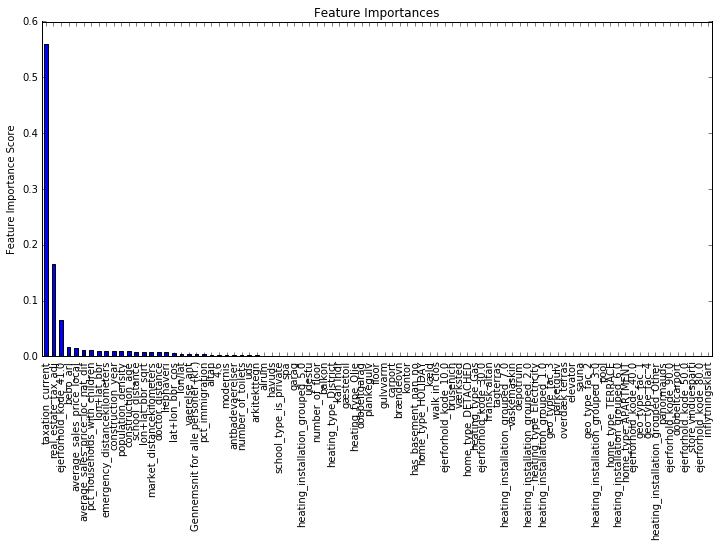

In [66]:
feat_imp = pd.Series(rf.feature_importances_, X_train_n2.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [68]:
type(feat_imp)

pandas.core.series.Series

In [70]:
for key, value in feat_imp.iteritems():
    print key, value

taxation_current 0.558876955378
real_estate_tax_adj 0.165574919789
ejerforhold_kode_41.0 0.0642833196746
bebo_arl 0.0173211907688
average_sales_price_local 0.014260761314
average_sales_price_loc_nat_dif 0.0113182228802
pct_households_with_children 0.0110138258031
lon+lat_bbr 0.00991630990491
emergency_distancekilometers 0.00981157794017
construction_year 0.00949237115759
population_density 0.00908404541186
construction_age 0.00870582695834
school_distance 0.00789197735844
lon+lat_bbr_sqrt 0.00784404134655
market_distancekilometers 0.00777596495333
doctor_distance 0.00750685518732
liebhaveri 0.00722160011666
lat+lon_bbr_cos 0.00557707910544
lon/lat 0.00468026062952
vaerelse_ant 0.00416915436237
Gennemsnit for alle personer (kr.) 0.00407695687404
pct_immigration 0.00388964791227
altan 0.00271970044167
4.6 0.00253482503238
modernis 0.00214730374452
antbadevaerelser 0.0019229556561
number_of_toilets 0.00188520585528
uds 0.00163436418241
arkitekttegn 0.00160074726406
alrum 0.00140641009327
